In [1]:
from scipy.signal import argrelextrema, find_peaks
from scipy.spatial.distance import cdist, squareform, pdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

### Create function for apply
- merge code into function
- takes df and returns df with same index and more columsn

In [2]:
from user_data.litmus.label_helpers import entry_exit_labeler

In [18]:
close_ = 500 + np.cumsum(0.1 + np.random.randint(-10, 10, 100))
close_

array([501.1, 494.2, 502.3, 492.4, 482.5, 477.6, 473.7, 469.8, 472.9,
       472. , 470.1, 478.2, 472.3, 464.4, 459.5, 462.6, 459.7, 454.8,
       463.9, 458. , 461.1, 455.2, 449.3, 453.4, 450.5, 458.6, 455.7,
       457.8, 449.9, 442. , 433.1, 434.2, 443.3, 433.4, 432.5, 427.6,
       435.7, 428.8, 427.9, 427. , 429.1, 438.2, 440.3, 440.4, 439.5,
       445.6, 444.7, 453.8, 459.9, 451. , 456.1, 446.2, 439.3, 433.4,
       426.5, 422.6, 423.7, 420.8, 419.9, 428. , 420.1, 421.2, 412.3,
       414.4, 406.5, 404.6, 396.7, 399.8, 406.9, 413. , 404.1, 399.2,
       405.3, 412.4, 408.5, 403.6, 404.7, 403.8, 403.9, 394. , 396.1,
       392.2, 394.3, 400.4, 396.5, 401.6, 407.7, 410.8, 408.9, 402. ,
       410.1, 412.2, 405.3, 401.4, 404.5, 402.6, 392.7, 401.8, 410.9,
       418. ])

In [21]:
test_df = pd.DataFrame(close_, columns=["close"], index=np.arange(len(close_)))
results = entry_exit_labeler(test_df["close"], min_growth=0.04, max_duration=5)
results = pd.concat([test_df, results], axis=1)
results

,close,&target
0,501.1,transition
1,494.2,bad_entry
2,502.3,bad_exit
3,492.4,transition
4,482.5,transition
...,...,...
95,402.6,transition
96,392.7,good_entry
97,401.8,transition
98,410.9,transition


<AxesSubplot:>

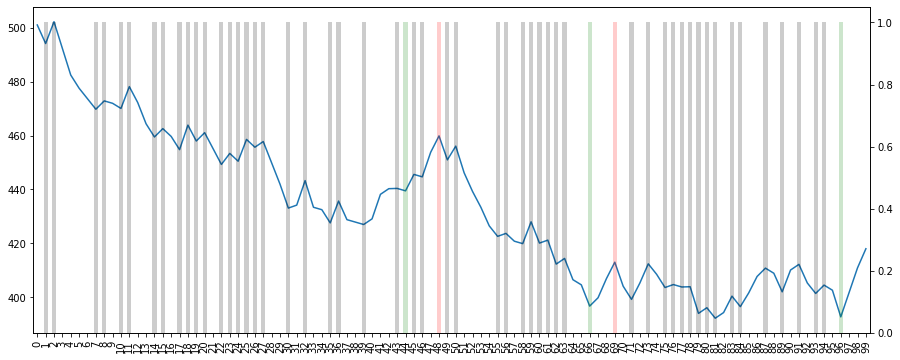

In [24]:
results["good_entry"] = np.where(results["&target"] == "good_entry", 1, 0)
results["good_exit"] = np.where(results["&target"] == "good_exit", 1, 0)
results["bad_entry"] = np.where(results["&target"] == "bad_entry", 1, 0)
results["bad_exit"] = np.where(results["&target"] == "bad_exit", 1, 0)

ax = results["close"].plot(figsize=(15,6))
results["good_entry"].plot(ax=ax, secondary_y=True, kind="bar", alpha=0.2, color="green")
results["good_exit"].plot(ax=ax, secondary_y=True, kind="bar", alpha=0.2, color="red")

results["bad_entry"].plot(ax=ax, secondary_y=True, kind="bar", alpha=0.2, color="black")
results["bad_exit"].plot(ax=ax, secondary_y=True, kind="bar", alpha=0.2, color="black")

In [26]:
results[36:50]

,close,&target,good_entry,good_exit,bad_entry,bad_exit
36,435.7,bad_exit,0,0,0,1
37,428.8,transition,0,0,0,0
38,427.9,transition,0,0,0,0
39,427.0,bad_entry,0,0,1,0
40,429.1,transition,0,0,0,0
41,438.2,transition,0,0,0,0
42,440.3,transition,0,0,0,0
43,440.4,bad_exit,0,0,0,1
44,439.5,good_entry,1,0,0,0
45,445.6,bad_exit,0,0,0,1


In [ ]:
# results["close"].plot(figsize=(20, 6))
results["&good_long_entry"].plot(secondary_y=True, kind="bar", alpha=0.2, color="green")
results["&good_long_exit"].plot(secondary_y=True, kind="bar", alpha=0.2, color="red")
results["&fake_long_entry"].plot(secondary_y=True, kind="bar", alpha=0.2, color="black")
results["&fake_long_exit"].plot(secondary_y=True, kind="bar", alpha=0.2, color="black")

In [ ]:
["&good_entry", "&good_exit", "&fake_entry", "&fake_exit"]

### Steps
- identify all peaks and valleys for close
- mask close to show just peaks and valleys
- compute cdist for all points in close
- mask dist that is > max_distance
- identify distances that are > min_threshold
- get idx for those points
- label those points as good entries and exists
- label all other peak/valleys as fake entries/exits

In [ ]:
close = 500 + np.cumsum(0.1 + np.random.randint(-10, 10, 20))
close

In [ ]:
# Find all peaks and valleys
peak_idx = find_peaks(close)[0]
valley_idx = find_peaks(-close)[0]
valley_idx, peak_idx

In [ ]:
# Mask valleys
valley_mask = np.zeros(close.shape, dtype=bool)
valley_mask[valley_idx] = True
valley_mask

In [ ]:
peak_mask = np.zeros(close.shape, dtype=bool)
peak_mask[peak_idx] = True
peak_mask

In [ ]:
peak_valley_mask = np.outer(valley_mask, peak_mask)
peak_valley_mask

In [ ]:
# Check we're on track
plt.plot(valley_mask*close)
plt.plot(peak_mask*close)
plt.plot(close)

In [ ]:
close_test = 500 + np.cumsum(0.1 + np.random.randint(-10, 10, 10))

In [ ]:
close_test

In [ ]:
# Compute distance matrix
def cdist_growth(a, b):
    return np.divide(b - a, a)

dist_matrix = cdist(close_test.reshape(-1, 1), close_test.reshape(-1, 1), metric=cdist_growth)
dist_matrix

In [ ]:
# Compute distance matrix
dist_matrix = cdist(close_test.reshape(-1, 1), close_test.reshape(-1, 1), metric="euclidean")
dist_matrix

In [ ]:
dist_matrix / close_test.reshape(-1, 1)

In [ ]:
# Scope to distances > min_threshold
min_growth = 0.02

growth_mask = (dist_matrix - min_growth) > 0
dist_matrix = dist_matrix*growth_mask

dist_matrix

In [ ]:
np.tril(dist_matrix, k=5)

In [ ]:
# Limit to max_duration
max_duration = 5
dist_matrix = np.tril(dist_matrix, k=max_duration)

# Remove lower triangle
dist_matrix = np.triu(dist_matrix)

dist_matrix

In [ ]:
# Scope using peak valley mask
scoped_dist_matrix = peak_valley_mask*dist_matrix
scoped_dist_matrix

In [ ]:
# Get idx for non zero distances
v, p = np.where(scoped_dist_matrix > 0)
v, p

In [ ]:
df = pd.DataFrame(close, columns=["close"])
df[["&long_entry", "&long_exit", "&fake_long_entry", "&fake_long_exit"]] = "No"

# Long Entries
df.loc[[i for i in valley_idx if i not in v], "&fake_long_entry"] = "Yes"
df.loc[v, "&long_entry"] = "Yes"

# Long Exits
df.loc[[i for i in peak_idx if i not in p], "&fake_long_exit"] = "Yes"
df.loc[p, "&long_exit"] = "Yes"

df

In [ ]:
# Check we're on track
plt.plot(valley_mask*close)
plt.plot(peak_mask*close)
plt.plot(close)

In [ ]:
test_df = pd.DataFrame(close, columns=["close"])

def test(df):
    return df/2

test_df[["close"]].apply(test)

### Old way

In [ ]:
close = 500 + np.cumsum(0.1 + np.random.randint(-10, 10, 30))
peak_idx = find_peaks(close)[0]
valley_idx = find_peaks(-close)[0]

plt.figure(figsize=(20,7))
plt.plot(close)
plt.bar(peak_idx, close[peak_idx], color="red", alpha=0.2)
plt.bar(valley_idx, close[valley_idx], color="green", alpha=0.2)

In [ ]:
# Ensure no peak before valley
print(peak_idx, valley_idx)

peak_idx = np.array([i for i in peak_idx if i > valley_idx.min()])
print(peak_idx)

In [ ]:
def cdist_growth(a, b):
    diff = b - a
    return np.divide(diff, a)

dist = cdist(close[valley_idx].reshape(-1, 1), close[peak_idx].reshape(-1, 1), metric=cdist_growth)
dist

In [ ]:
# Subtract min_threshold and go to upper triangle
min_threshold = 0.02
dist = dist - min_threshold
dist = np.triu(dist, k=0)
dist

In [ ]:
# Compute index distance
def simple_distance(a, b):
    diff = b - a
    return diff

idx_dist = cdist(valley_idx.reshape(-1, 1), peak_idx.reshape(-1, 1), metric=simple_distance)
idx_dist = np.triu(idx_dist, k=0)
idx_dist

In [ ]:
# Check min_distance and set to zero
min_distance = 5
idx_dist = idx_dist*(idx_dist < min_distance)
idx_dist

In [ ]:
# Reduce distance matrix to values where idx_dist is > 0
# What below means.
# All zero values are "fake_entries" and "fake_exists"
# Non zero are good "entries" and "exists"
# Cleanup needed to ensure "good" trumps "fake"

dist = dist*(idx_dist > 0)*(dist > 0)
dist

In [ ]:
(1000*dist).astype(int)

In [ ]:
p, v = np.where(dist > 0)
v, p

In [ ]:
valley_idx[v], peak_idx[p]

In [ ]:
valley_idx, peak_idx

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(close)
plt.bar(peak_idx, close[peak_idx], color="red", alpha=0.2)
plt.bar(valley_idx, close[valley_idx], color="green", alpha=0.2)

In [ ]:
peak_idx, valley_idx

In [ ]:
# Need to access idx where growth is above min_threshold
for i, row in enumerate(dist):
    for j, value in enumerate(row):
        print(valley_idx[i], peak_idx[j], value)

In [ ]:
max_peaks = argrelextrema(df["close"].values, lambda a, b: a < b, order=15)[0]
min_peaks = argrelextrema(df["close"].values, lambda a, b: a > b, order=15)[0]

df["maxima"] = 0
df.loc[max_peaks, "maxima"] = 1

df["minima"] = 0
df.loc[min_peaks, "minima"] = 1

df["close"].plot(figsize=(20,8))
df["maxima"].plot(secondary_y=True)
df["minima"].plot(secondary_y=True)

In [ ]:
df[df["minima"].isin([1, 2])]

In [ ]:
df[180:300]["close"].plot(figsize=(20,8))
df[180:300]["maxima"].plot(secondary_y=True)
df[180:300]["minima"].plot(secondary_y=True)
df[180:300]["smeared-maxima"].plot(secondary_y=True)

In [ ]:
from scipy.signal import find_peaks
df = pd.DataFrame(1000 + np.cumsum(0.1 + np.random.randint(-10, 10, 100)), columns=['close'])

In [ ]:
np.triu(dist, k=0)

In [ ]:
def find_peak_valley(df, min_threshold, min_distance):
    
    df = df.copy()
    peak = find_peaks(df)[0]
    valley = find_peaks(-df)[0]
    
    df["long_exit"] = 0
    df["long_entry"] = 0
    df["fake_long_exit"] = 0
    df["fake_long_entry"] = 0
    df.loc[valley, "fake_long_entry"] = 1
    
    for i, v in df.loc[valley, :].iterrows():
        for j, p in df.loc[peak, :].iterrows():
            v_value = valleys.loc[i]["close"]
            p_value = peaks.loc[j]["close"]
            if j < i:
                print(f"Wrong order: {i}, {j}")
                continue
            elif j - i > min_distance:
                print(f"min distance exceeded {j - i}")
                break
            elif (p_value - v_value) / v_value > min_threshold:
                print(f"threshold exceeded: {v_value}, {p_value}")
                df.loc[i, "long_entry"] = 1
                df.loc[i, "fake_long_entry"] = 0
                df.loc[j, "long_exit"] = 1
                break
            else:
                print(f"Insufficient peak found: {v_value}, {p_value}")
                df.loc[j, "fake_long_exit"] = 1

    # Ensure no conflicting labels
    df.loc[df["long_exit"] == 1, "fake_long_exit"] = 0
    
df.apply(find_peak_valley, min_threshold=0.2, min_distance=10)

In [ ]:
df

In [ ]:
min_distance = 10
min_threshold = 0.02

peak = find_peaks(df["close"].values)[0]
valley = find_peaks(-df["close"].values)[0]

df["long_exit"] = 0
df["long_entry"] = 0
df["fake_long_exit"] = 0
df["fake_long_entry"] = 0
df.loc[valley, "fake_long_entry"] = 1

df["peak"] = 0
df.loc[peak, "peak"] = 1
df["valley"] = 0
df.loc[valley, "valley"] = 1

In [ ]:
# Find all peaks within min_distance
peaks = df[df["peak"] == 1]
valleys = df[df["valley"] == 1]
print(peaks.shape)
valleys.shape

for i, v in valleys.iterrows():
    for j, p in peaks.iterrows():
        v_value = valleys.loc[i]["close"]
        p_value = peaks.loc[j]["close"]
        if j < i:
            print(f"Wrong order: {i}, {j}")
            continue
        elif j - i > min_distance:
            print(f"min distance exceeded {j - i}")
            break
        elif (p_value - v_value) / v_value > min_threshold:
            print(f"threshold exceeded: {v_value}, {p_value}")
            df.loc[i, "long_entry"] = 1
            df.loc[i, "fake_long_entry"] = 0
            df.loc[j, "long_exit"] = 1
            break
        else:
            print(f"Insufficient peak found: {v_value}, {p_value}")
            df.loc[j, "fake_long_exit"] = 1

# Ensure no conflicting labels
df.loc[df["long_exit"] == 1, "fake_long_exit"] = 0

In [ ]:
df["close"].plot(figsize=(20,8))
df["long_entry"].plot(secondary_y=True, kind="bar", color="green", alpha=0.2)
df["long_exit"].plot(secondary_y=True, kind="bar", color="green", alpha=0.2)
df["fake_long_entry"].plot(secondary_y=True, kind="bar", color="red", alpha=0.2)
df["fake_long_exit"].plot(secondary_y=True, kind="bar", color="red", alpha=0.2)

In [ ]:
df = pd.DataFrame(1000 + np.cumsum(0.1 + np.random.randint(-10, 10, 10000)), columns=['close'])

# Find all good entries and exits for longs
min_distance = 10
min_threshold = 0.02

peak = find_peaks(df["close"].values)[0]
valley = find_peaks(-df["close"].values)[0]
print(peak.shape)
print(valley.shape)

df["&long_exit"] = "No"
df["&long_entry"] = "No"
df["&fake_long_exit"] = "No"
df["&fake_long_entry"] = "No"
df.loc[valley, "&fake_long_entry"] = "Yes"

for i, v in df.loc[valley, :].iterrows():
    for j, p in df.loc[peak, :].iterrows():
        v_value = df.loc[i, "close"]
        p_value = df.loc[j, "close"]
        if j < i:
            print(f"Wrong order: {i}, {j}")
            continue
        elif j - i > min_distance:
            print(f"min distance exceeded {j - i}")
            break
        elif (p_value - v_value) / v_value > min_threshold:
            print(f"threshold exceeded: {v_value}, {p_value}")
            df.loc[i, "&long_entry"] = "Yes"
            df.loc[j, "&long_exit"] = "Yes"
            break
        else:
            print(f"Insufficient peak found: {v_value}, {p_value}")
            df.loc[j, "&fake_long_exit"] = "Yes"

# Ensure no conflicting labels
df.loc[df["&long_exit"] == "Yes", "&fake_long_exit"] = "No"

In [ ]:
df.head(50)

In [ ]:
from catboost import CatBoostClassifier

df["dummy"] = df["close"] *4
X_train = df[["close", "dummy"]]
y_train = df[["&long_exit", "&long_entry", "&fake_long_exit", "&fake_long_entry"]]

clf = CatBoostClassifier(loss_function="MultiLogloss")
clf.fit(X_train, y_train)

In [ ]:
clf.predict(X_train)

In [ ]:
df[["long_exit", "long_entry", "fake_long_exit", "fake_long_entry"]].replace(replace_rules, inplace=True)
y_train

In [ ]:
y_train

In [ ]:
# Longs
threshold = 0.01
max_distance = 20
seeking = "valley"
df["valley_target"] = 0
df["peak_target"] = 0

for i, r in minmax_df.iterrows():
    if seeking == "valley":
        print("seeking valley")
        # Find valley
        if r["valley"] == 1:
            valley_value = r["close"]
            valley_idx = i
            print(f"found valley with value: {valley_value} at {i}")
            seeking = "peak"
        continue
        
    if seeking == "peak":
        print("seeking peak")
        # Check if max_distance exceeded
        if i - valley_idx > max_distance:
            print("max distance exceeded")
            seeking = "valley"
            continue
        # Compare to next peak
        if r["peak"] == 1:
            peak_value = r["close"]
            pct_delta = (peak_value - valley_value)/valley_value
            print(f"found peak with delta: {pct_delta}")
            if pct_delta > threshold:
                print(f"confirmed peak at {i}")
                df.at[valley_idx, "valley_target"] = 1
                df.at[i, "peak_target"] = 1
                seeking = "valley"

In [ ]:
df["close"].plot(figsize=(20,8))
df["peak_target"].plot(secondary_y=True)
df["valley_target"].plot(secondary_y=True)

In [ ]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist, pdist, squareform

peak_values = df[df["peak"] == 1]["close"].values.reshape(-1,1)
valley_values = df[df["valley"] == 1]["close"].values.reshape(-1,1)

def custom_calc(x, y):
    return (y-x)/x

d = cdist(peak_values, valley_values, metric=custom_calc)

d

In [ ]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist, pdist, squareform

close_prices = df["close"].values.reshape(-1,1)

def custom_calc(x, y):
    return (y-x)/x

d = pdist(close_prices, metric=custom_calc)

squareform(d).shape

In [ ]:
df["valley"] == 1

In [ ]:
# Define Min & Max binary indicators
min_peaks = argrelextrema(df["close"].values, np.less, order=20)
max_peaks = argrelextrema(df["close"].values, np.greater, order=20)

df["&s-minima"] = 0
df["&s-maxima"] = 0
df["real-minima"] = 0
df["real-maxima"] = 0

df["pct_ahead"] = df["close"].shift(-1) / df["close"]
df["pct_be"] = df["close"].shift(-1) / df["close"]

proximity_tolerance = 0.1

for mp in min_peaks[0]:
    df.at[mp, "real-minima"] = 1
    df.at[mp, "&s-minima"] = 1
    min_peak_value = df.at[mp, "close"]
    if abs(df.at[mp - 1, "close"] / min_peak_value - 1) < proximity_tolerance:
        df.at[mp - 1, "&s-minima"] = 1
    if abs(df.at[mp + 1, "close"] / min_peak_value - 1) < proximity_tolerance:
        df.at[mp + 1, "&s-minima"] = 1

for mp in max_peaks[0]:
    df.at[mp, "real-maxima"] = 1
    df.at[mp, "&s-maxima"] = 1
    max_peak_value = df.at[mp, "close"]
    if abs(df.at[mp - 1, "close"] / max_peak_value - 1) < proximity_tolerance:
        df.at[mp - 1, "&s-maxima"] = 1
    if abs(df.at[mp + 1, "close"] / max_peak_value - 1) < proximity_tolerance:
        df.at[mp + 1, "&s-maxima"] = 1

In [ ]:
df

In [ ]:
df.loc[:, "long_exit"] == 1

In [ ]:
df.head(50)

In [ ]:
from scipy.signal import find_peaks

In [ ]:
df = yf.download("AAPL")["Close"][8000:].reset_index()
df

In [ ]:
max_peaks, _ = find_peaks(df["Close"], prominence=2, wlen=400)
min_peaks, _ = find_peaks(-df["Close"], prominence=2, wlen=400)

In [ ]:
df["maxima"] = 0
df.loc[max_peaks, "maxima"] = 1

df["minima"] = 0
df.loc[min_peaks, "minima"] = 1

df["Close"].plot(figsize=(20,8))
df["maxima"].plot(secondary_y=True)
df["minima"].plot(secondary_y=True)

In [ ]:
df["max_peak"] = 0
df.loc[peak_idx, "max_peak"] = df.loc[peak_idx, "close"]

In [ ]:
df["close"].plot(figsize=(20,10), ylim=(850, 1100))
df["max_peak"].plot()

In [ ]:
import yfinance as yf

In [ ]:
h = ["g", "b", "c"]

In [ ]:
h[0:1]

In [ ]:
def entry_exit_labeler(close_df, direction, min_growth, max_duration):
    """Label timeseries for good entries and exits at peaks"""

    logger.info(f"Labeling for {direction} trades for {len(close_df)} samples")
    logger.info(f"Labeling settings: min_growth {min_growth}, max_duration {max_duration}")
    start_time = time.time()

    close = close_df.values
    if direction == "short":
        close = close * -1

    # Find all peaks and valleys
    max_idx = find_peaks(close)[0]
    min_idx = find_peaks(-close)[0]

    # Mask valleys & peaks
    min_mask = np.zeros(close.shape, dtype=bool)
    min_mask[min_idx] = True
    max_mask = np.zeros(close.shape, dtype=bool)
    max_mask[max_idx] = True

    # Compute joint max x min joint mask
    if direction == "long":
        minmax_mask = np.outer(min_mask, max_mask)
    elif direction == "short":
        minmax_mask = np.outer(max_mask, min_mask)

    # Compute distance matrix between all close points
    euclidean_dist_matrix = cdist(close.reshape(-1, 1), close.reshape(-1, 1), metric="euclidean")
    # Compute growth rate by dividing euclidean by close
    dist_matrix = euclidean_dist_matrix / close.reshape(-1, 1)

    # Scope dist_matrix to distances > min_threshold
    growth_mask = (dist_matrix - min_growth) > 0
    dist_matrix = dist_matrix * growth_mask

    # Limit to max_duration & remove lower triangle
    dist_matrix = np.tril(dist_matrix, k=max_duration)
    dist_matrix = np.triu(dist_matrix)

    # Scope to only peak & valley points
    dist_matrix = minmax_mask * dist_matrix
    dist_matrix

    # Get idx for non zero distances
    good_entry_idx, good_exit_idx = np.where(dist_matrix > 0)

    # Populate DataFrame and return
    if direction == "long":
        col_names = ["&long_target", "bad_long_entries", "bad_long_exits",
                     "good_long_entries", "good_long_exits"]
        target_names = ["is_good_long_entry", "is_good_long_exit",
                        "is_bad_long_entry", "is_bad_long_exit", "long_transition"]
        df = pd.DataFrame(columns=col_names, index=close_df.index)

    elif direction == "short":
        col_names = ["&short_target", "bad_short_entries", "bad_short_exits",
                     "good_short_entries", "good_short_exits"]
        target_names = ["is_good_short_entry", "is_good_short_exit",
                        "is_bad_short_entry", "is_bad_short_exit", "short_transition"]
        df = pd.DataFrame(columns=col_names, index=close_df.index)

    # Set default values of columns
    df.loc[:, :] = 0
    df.loc[:, col_names[0]] = target_names[4]

    # Entries & Exits
    if direction == "long":
        entry_idx = min_idx
        exit_idx = max_idx
    elif direction == "short":
        entry_idx = max_idx
        exit_idx = min_idx

    """df.loc[[i for i in entry_idx if i not in good_entry_idx], col_names[2]] = col_names[2]
    df.loc[good_entry_idx, col_names[0]] = col_names[0]
    df.loc[[i for i in exit_idx if i not in good_exit_idx], col_names[3]] = col_names[3]
    df.loc[good_exit_idx, col_names[1]] = col_names[1]"""

    """df.loc[entry_idx, col_names[2]] = col_names[2]
    df.loc[good_entry_idx, col_names[0]] = col_names[0]
    df.loc[exit_idx, col_names[3]] = col_names[3]
    df.loc[good_exit_idx, col_names[1]] = col_names[1]"""

    # Bad entries
    df.loc[[i for i in entry_idx if i not in good_entry_idx], col_names[0]] = col_names[2]
    df.loc[[i for i in entry_idx if i not in good_entry_idx], col_names[1]] = 1
    # Good entries
    df.loc[good_entry_idx, col_names[0]] = col_names[0]
    df.loc[good_entry_idx, col_names[3]] = 1
    # Bad exit
    df.loc[[i for i in exit_idx if i not in good_exit_idx], col_names[0]] = col_names[3]
    df.loc[[i for i in exit_idx if i not in good_exit_idx], col_names[2]] = 1
    # Good exit
    df.loc[good_exit_idx, col_names[0]] = col_names[1]
    df.loc[good_exit_idx, col_names[4]] = 1

    end_time = time.time() - start_time
    logger.info(f"Time taken to label data: {end_time} seconds")
    print(end_time)

    return df